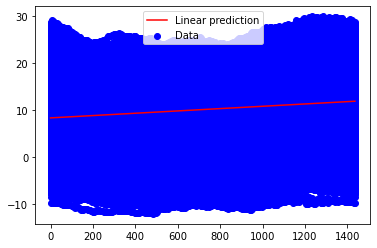

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

years = range(2011, 2017)
files = ['CRNS0101-05-%d-CA_Yosemite_Village_12_W.txt' % y for y in years]
usecols = [1, 2, 8]

data = [np.loadtxt(f, usecols=usecols) for f in files]
data = np.vstack(data)

# Map from HHmm to an integer
data[:, 1] = np.floor_divide(data[:, 1], 100) * 60 + np.mod(data[:, 1], 100)
valid = data[:, 2] > -1000

x_train = data[valid, 1].reshape(-1, 1)
y_train = data[valid, 2]
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

x_predict = [[0], [1435]]
y_predict = regr.predict(x_predict)

plt.scatter(data[valid, 1], data[valid, 2], label='Data', color='b')
plt.plot(x_predict, y_predict, label='Linear prediction', color='r')
plt.legend(loc='best')
plt.show()

centers.shape (6, 1)
heights.shape (4, 1)
weights.shape (4, 1)
x.shape (4, 6)
Original inputs [[1.32]
 [1.45]
 [1.66]
 [1.88]]
RBF repr [[0.96644264 0.9952115  0.99786894 0.97420519 0.92607505 0.85715773]
 [0.93472772 0.97938218 0.99916701 0.99252805 0.95998911 0.9040837 ]
 [0.86484931 0.93189668 0.97771865 0.99880072 0.99348796 0.96219963]
 [0.77249223 0.85715773 0.92607505 0.97420519 0.99786894 0.9952115 ]]
Score on training data =  0.8628958444400455
all_x.shape (1000, 1)
expanded_x.shape (1000, 6)
all_y.shape (1000, 1)


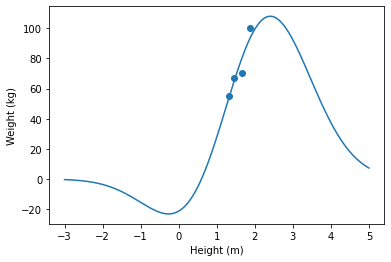

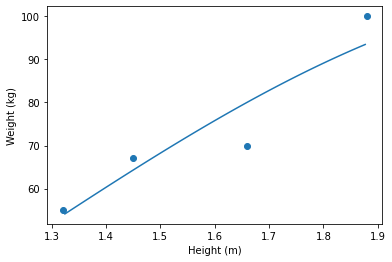

In [5]:
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import numpy as np


heights = np.asarray([1.32, 1.45, 1.66, 1.88]).reshape(-1, 1)
weights = np.asarray([55, 67, 70, 100]).reshape(-1, 1)
centers = np.asarray([1.0, 1.2, 1.4, 1.6, 1.8, 2.0]).reshape(-1, 1)
print("centers.shape", centers.shape)
print("heights.shape", heights.shape)
print("weights.shape", weights.shape)

sigma = 3
alpha = 0.0013

# New representation:
x = rbf_kernel(heights, centers, gamma=1.0 / sigma)
print("x.shape", x.shape)
print("Original inputs", heights)
print("RBF repr", x)

# Now go and fit a linear model between x and height
regr = Ridge(alpha=alpha, fit_intercept=False)
regr.fit(x, weights)
print("Score on training data = ", regr.score(x, weights))
all_x = np.linspace(-3.0, 5.0, 1000).reshape(-1, 1)

# New representation:
expanded_x = rbf_kernel(all_x, centers, gamma=1.0 / sigma)
all_y = regr.predict(expanded_x)
print("all_x.shape", all_x.shape)
print("expanded_x.shape", expanded_x.shape)
print("all_y.shape", all_y.shape)

# Show that the predictions tend to zero far away from inputs
plt.figure()
plt.plot(all_x, all_y)
plt.scatter(heights, weights)
plt.xlabel("Height (m)")
plt.ylabel("Weight (kg)")


# Zoom in and see how well predictions fit the data
zoom_ind = (all_x > heights.min()) & (all_x < heights.max())
plt.figure()
plt.plot(all_x[zoom_ind], all_y[zoom_ind])
plt.scatter(heights, weights)
plt.xlabel("Height (m)")
plt.ylabel("Weight (kg)")
plt.show()

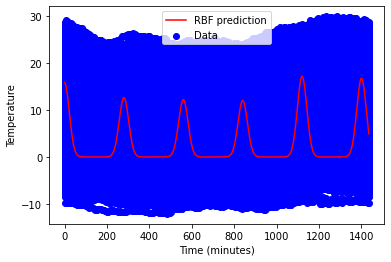

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics.pairwise import rbf_kernel

# Step 1: Preprocess the Data
years = range(2011, 2017)
files = ['CRNS0101-05-%d-CA_Yosemite_Village_12_W.txt' % y for y in years]
usecols = [1, 2, 8]

data = [np.loadtxt(f, usecols=usecols) for f in files]
data = np.vstack(data)

# Map from HHmm to an integer
data[:, 1] = np.floor_divide(data[:, 1], 100) * 60 + np.mod(data[:, 1], 100)
valid = data[:, 2] > -1000

x_train = data[valid, 1].reshape(-1, 1)
y_train = data[valid, 2]

# Step 2: Define the Radial Basis Function
centers = np.linspace(0, 1400, 6).reshape(-1, 1)

# Step 3: Transform the Data
sigma = 1000
x_rbf = rbf_kernel(x_train, centers, gamma=1.0 / sigma)

# Step 4: Fit the Linear Model
alpha = 3
regr = Ridge(alpha=alpha, fit_intercept=False)
regr.fit(x_rbf, y_train)

# Step 5: Visualize the Results
x_predict = np.linspace(0, 1435, 1000).reshape(-1, 1)
x_predict_rbf = rbf_kernel(x_predict, centers, gamma=1.0 / sigma)
y_predict = regr.predict(x_predict_rbf)

plt.scatter(x_train, y_train, label='Data', color='b')
plt.plot(x_predict, y_predict, label='RBF prediction', color='r')
plt.legend(loc='best')
plt.xlabel("Time (minutes)")
plt.ylabel("Temperature")
plt.show()


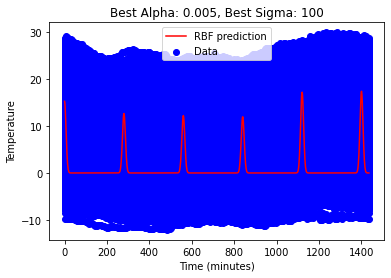

Best Alpha: 0.005, Best Sigma: 100
Adjusted R-squared: -1.4872239864123022
Mean Squared Error: 152.10854427769624
Mean Absolute Error: 10.3534167662135


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics.pairwise import rbf_kernel

# Load temperature dataset
years = range(2011, 2017)
files = ['CRNS0101-05-%d-CA_Yosemite_Village_12_W.txt' % y for y in years]
usecols = [1, 2, 8]

data = [np.loadtxt(f, usecols=usecols) for f in files]
data = np.vstack(data)

# Map from HHmm to an integer
data[:, 1] = np.floor_divide(data[:, 1], 100) * 60 + np.mod(data[:, 1], 100)
valid = data[:, 2] > -1000

x_train = data[valid, 1].reshape(-1, 1)
y_train = data[valid, 2]

# Define a range of alpha and sigma values
#alpha_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]
#sigma_values = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000]
alpha_values = [0.005]
sigma_values = [100]

# Initialize variables to store best parameters and corresponding metrics
best_alpha = None
best_sigma = None
best_r2 = float('-inf')
lowest_mse = float('inf')
lowest_mae = float('inf')
adjusted_r2 = float('-inf')

# Iterate through all combinations of alpha and sigma
for alpha in alpha_values:
    for sigma in sigma_values:
        # Transform the data using RBF Kernel
        x_rbf = rbf_kernel(x_train, centers, gamma=1.0 / sigma)

        # Fit the Ridge Regression
        regr = Ridge(alpha=alpha, fit_intercept=False)
        regr.fit(x_rbf, y_train)

        # Calculate Predictions
        y_pred = regr.predict(x_rbf)

        # Calculate Metrics
        mse = mean_squared_error(y_train, y_pred)
        mae = mean_absolute_error(y_train, y_pred)
        r2 = r2_score(y_train, y_pred)
        n = len(y_train)
        p = len(centers)

        # Calculate Adjusted R-squared
        adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

        # Record best parameters and metrics
        if adjusted_r2 > best_r2:
            best_alpha = alpha
            best_sigma = sigma
            best_r2 = r2
            lowest_mse = mse
            lowest_mae = mae

# Fit the best model using the best alpha and sigma
x_rbf_best = rbf_kernel(x_train, centers, gamma=1.0 / best_sigma)
regr_best = Ridge(alpha=best_alpha, fit_intercept=False)
regr_best.fit(x_rbf_best, y_train)

# Visualize the Results with the best parameters
x_predict = np.linspace(0, 1435, 1000).reshape(-1, 1)
x_predict_rbf = rbf_kernel(x_predict, centers, gamma=1.0 / best_sigma)
y_predict = regr_best.predict(x_predict_rbf)

plt.scatter(x_train, y_train, label='Data', color='b')
plt.plot(x_predict, y_predict, label='RBF prediction', color='r')
plt.legend(loc='best')
plt.xlabel("Time (minutes)")
plt.ylabel("Temperature")
plt.title(f'Best Alpha: {best_alpha}, Best Sigma: {best_sigma}')
plt.show()

# Print Metrics
print(f'Best Alpha: {best_alpha}, Best Sigma: {best_sigma}')
print(f'Adjusted R-squared: {adjusted_r2}')
print(f'Mean Squared Error: {lowest_mse}')
print(f'Mean Absolute Error: {lowest_mae}')


# Aroma's code!

Score on training data =  0.044493219186645616


[]

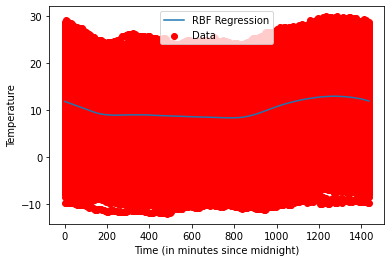

In [17]:
## EXECUTE 10 RBFS
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import numpy as np

# Define the centers for radial basis functions
times = (x_train)
temperatures = (y_train).reshape(-1, 1)
centers = np.linspace(0, 1435, 100).reshape(-1, 1)  # Divide the day into 10 intervals

# Parameters for radial basis functions and Ridge regression
sigma = 3000  # Adjust this value based on the data distribution
alpha = 0.005  # Regularization strength

# Transform the input data using radial basis functions
x = rbf_kernel(times, centers, gamma=1.0 / sigma)

# Fit a Ridge regression model
regr = Ridge(alpha=alpha, fit_intercept=True)  # You can experiment with fit_intercept
regr.fit(x, temperatures)
print("Score on training data = ", regr.score(x, temperatures))

# Generate predictions for visualization
all_x = np.linspace(0, 1435, 1000).reshape(-1, 1)
# Transform the new input data using radial basis functions
expanded_x = rbf_kernel(all_x, centers, gamma=1.0 / sigma)
# Predict the output values for the new input data
all_y = regr.predict(expanded_x)

# Visualize the results
plt.figure()
plt.plot(all_x, all_y, label='RBF Regression')
plt.scatter(times, temperatures, label='Data', color='r')
plt.xlabel("Time (in minutes since midnight)")
plt.ylabel("Temperature")
plt.legend(loc='best')
plt.plot()



Best R-squared: 0.04449322132440536
Best Alpha: 0.001
Best Sigma: 2782.222222222222


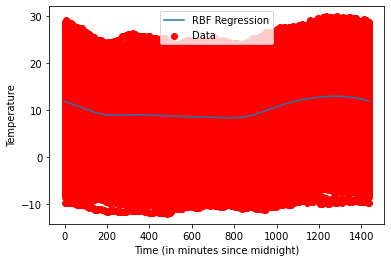

/Users/felipebandeira/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


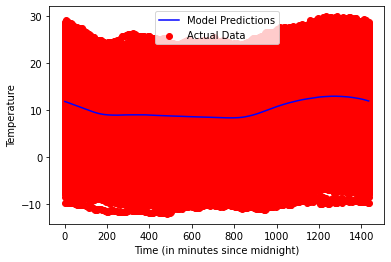

In [23]:
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import numpy as np

# Define the centers for radial basis functions
times = (x_train)
temperatures = (y_train).reshape(-1, 1)
centers = np.linspace(0, 1435, 60).reshape(-1, 1)  # Divide the day into 60 intervals

best_r_squared = -1  # Initialize with a value that will be beaten by any valid r-squared
best_alpha = None
best_sigma = None

# Define a range of alpha and sigma values to try
alpha_range = np.linspace(0.001, 1, 10)
sigma_range = np.linspace(10, 5000, 10)

for alpha in alpha_range:
    for sigma in sigma_range:

        # Transform the input data using radial basis functions
        x = rbf_kernel(times, centers, gamma=1.0 / sigma)

        # Fit a Ridge regression model
        regr = Ridge(alpha=alpha, fit_intercept=True)  
        regr.fit(x, temperatures)

        # Calculate R-squared
        r_squared = regr.score(x, temperatures)

        if r_squared > best_r_squared:
            best_r_squared = r_squared
            best_alpha = alpha
            best_sigma = sigma

# Print the best combination
print(f"Best R-squared: {best_r_squared}")
print(f"Best Alpha: {best_alpha}")
print(f"Best Sigma: {best_sigma}")

# Now, use the best alpha and sigma to train the model again
x = rbf_kernel(times, centers, gamma=1.0 / best_sigma)
regr = Ridge(alpha=best_alpha, fit_intercept=True)  
regr.fit(x, temperatures)

# Generate predictions for visualization
all_x = np.linspace(0, 1435, 1000).reshape(-1, 1)
expanded_x = rbf_kernel(all_x, centers, gamma=1.0 / best_sigma)
all_y = regr.predict(expanded_x)

# Visualize the results
plt.figure()
plt.plot(all_x, all_y, label='RBF Regression')
plt.scatter(times, temperatures, label='Data', color='r')
plt.xlabel("Time (in minutes since midnight)")
plt.ylabel("Temperature")
plt.legend(loc='best')

# Display the plots
plt.show()
